In [1]:
import pandas as pd
import numpy as np
import zipfile
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Пункт 1. Распаковываем zip и читаем csv

In [2]:
file = zipfile.ZipFile('yellow_tripdata_2019-01.zip')
file.extractall('test')

In [3]:
file = pd.read_csv('test/yellow_tripdata_2019-01.csv')

In [4]:
file.shape

(7667792, 18)

In [5]:
file.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
2,2,2018-12-21 13:48:30,2018-12-21 13:52:40,3,0.0,1,N,236,236,1,4.5,0.5,0.5,0.00,0.0,0.3,5.80,NaN
3,2,2018-11-28 15:52:25,2018-11-28 15:55:45,5,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,7.55,NaN
4,2,2018-11-28 15:56:57,2018-11-28 15:58:33,5,0.0,2,N,193,193,2,52.0,0.0,0.5,0.00,0.0,0.3,55.55,NaN


## Пункт 2. Удаляем trip_distance == 0.0

In [6]:
file= file.loc[file['trip_distance'] != 0.0]

In [7]:
file.shape

(7613022, 18)

## Меняем тип object на datetime

In [8]:
file['tpep_pickup_datetime'] = pd.to_datetime(file['tpep_pickup_datetime'])
file['tpep_dropoff_datetime'] = pd.to_datetime(file['tpep_dropoff_datetime'])

In [9]:
file.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
dtype: object

## 3. Оставляем поездки только за январь 2019 года

In [10]:
file = file[file['tpep_pickup_datetime'].map(lambda x : (x.year == 2019) & (x.month == 1))]

In [11]:
file.shape

(7612514, 18)

## Время посдадки и высадки совпадает - удаляем

In [12]:
file.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,NaN
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,13.5,0.5,0.5,3.70,0.0,0.3,18.50,NaN
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,10.0,0.5,0.5,1.70,0.0,0.3,13.00,NaN


In [13]:
file = file[file['tpep_pickup_datetime'] != file['tpep_dropoff_datetime']]

In [14]:
file.shape

(7612192, 18)

## Время высадки меньше, чем время посадки - удаляем

In [15]:
file = file[file['tpep_pickup_datetime'] < file['tpep_dropoff_datetime']]

In [16]:
file.shape

(7612189, 18)

## 4. Удаляем третью компанию 

### Смотрим сколько компаний всего:

In [17]:
file.groupby('VendorID').count()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
VendorID,,,,,,,,,,,,,,,,,
1,2914473,2914473,2914473,2914473,2914473,2914473,2914473,2914473,2914473,2914473,2914473,2914473,2914473,2914473,2914473,2914473,1072853
2,4621335,4621335,4621335,4621335,4621335,4621335,4621335,4621335,4621335,4621335,4621335,4621335,4621335,4621335,4621335,4621335,1710175
4,76381,76381,76381,76381,76381,76381,76381,76381,76381,76381,76381,76381,76381,76381,76381,76381,8870


### Удаляем компанию с ID 4

In [18]:
file= file[file['VendorID'] != 4]

In [19]:
file.shape

(7535808, 18)

## 5. Удаляем поездки, в которых было 0 пассажиров

In [20]:
file.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,NaN
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,13.5,0.5,0.5,3.70,0.0,0.3,18.50,NaN
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,10.0,0.5,0.5,1.70,0.0,0.3,13.00,NaN


In [21]:
file= file[file['passenger_count'] != 0]

In [22]:
file.shape

(7420182, 18)

## 6. Отрицательная или нулевая плата - удаляем

In [23]:
file = file[file['total_amount'] > 0]

In [24]:
file.shape

(7414361, 18)

## 7. Цена поездки слишком большая - удаляем

### Находим длину каждой поездки и создаём новый столбец 

In [25]:
file['ride_time']= file['tpep_dropoff_datetime'] - file['tpep_pickup_datetime']

In [26]:
file.dtypes

VendorID                           int64
tpep_pickup_datetime      datetime64[ns]
tpep_dropoff_datetime     datetime64[ns]
passenger_count                    int64
trip_distance                    float64
RatecodeID                         int64
store_and_fwd_flag                object
PULocationID                       int64
DOLocationID                       int64
payment_type                       int64
fare_amount                      float64
extra                            float64
mta_tax                          float64
tip_amount                       float64
tolls_amount                     float64
improvement_surcharge            float64
total_amount                     float64
congestion_surcharge             float64
ride_time                timedelta64[ns]
dtype: object

### Преобразуем получившийся тип timedelta в float64. Столбец ride_time получится в секундах

In [27]:
file['ride_time'] = file['ride_time'] / datetime.timedelta(seconds=1)

In [28]:
file.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
RatecodeID                        int64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
ride_time                       float64
dtype: object

In [29]:
file.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,ride_time
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,400.0
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,1152.0
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,NaN,429.0
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,13.5,0.5,0.5,3.70,0.0,0.3,18.50,NaN,818.0
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,10.0,0.5,0.5,1.70,0.0,0.3,13.00,NaN,720.0


### Выбираем только те поездки, что стоят не более 10 за минуту

In [30]:
file = file[file['total_amount'] / (file['ride_time'] / 60) <= 10]

In [31]:
file.shape

(7397330, 19)

## 8. Удаляем слишком длинные поездки

In [32]:
file.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,ride_time
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,400.0
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,1152.0
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,NaN,429.0
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,13.5,0.5,0.5,3.70,0.0,0.3,18.50,NaN,818.0
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,10.0,0.5,0.5,1.70,0.0,0.3,13.00,NaN,720.0


### Удаляем поездки, превышающие 6 миль:

In [33]:
file = file[file['trip_distance'] <= 6]

In [34]:
file.shape

(6599671, 19)

### Удаляем поездки, по времени превышающие 60 минут:

In [35]:
file = file[file['ride_time'] <= 3600]

In [36]:
file.shape

(6582297, 19)

### 9. Средние значения

#### Средняя длина поездки в милях:

In [37]:
mean_distance = file['trip_distance'].mean()
mean_distance

1.7393211214871656

#### Средняя продолжительность поездки в минутах:

In [38]:
file['ride_time'] = file['ride_time'] / 60

In [39]:
file.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,ride_time
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,7.0,0.5,0.5,1.65,0.0,0.3,9.95,NaN,6.666667
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,14.0,0.5,0.5,1.00,0.0,0.3,16.30,NaN,19.200000
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,6.5,0.5,0.5,1.25,0.0,0.3,9.05,NaN,7.150000
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,13.5,0.5,0.5,3.70,0.0,0.3,18.50,NaN,13.633333
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,10.0,0.5,0.5,1.70,0.0,0.3,13.00,NaN,12.000000


In [40]:
mean_time = file['ride_time'].mean()
mean_time

10.667855560148537

#### Средняя стоимость поездки в долларах:

In [41]:
file['total_amount'].mean()

11.71728009776431

#### Среднее число пассажиров:

In [42]:
mean_passengers = file['passenger_count'].mean()
mean_passengers

1.597073635540906

In [43]:
file.groupby('VendorID').aggregate({'trip_distance' : 'mean', 'ride_time' : 'mean', 'total_amount' : 'mean', 'passenger_count' : 'mean'})

,trip_distance,ride_time,total_amount,passenger_count
VendorID,,,,
1,1.708168,10.699460,11.696810,1.248385
2,1.758745,10.648151,11.730043,1.814475


### 10. Средняя цена перевозки за одну милю и за одну минуту

#### Добавим новые столбцы:

In [44]:
file['price_per_min'] = file['total_amount'] / file['ride_time']
file['price_per_mile'] = file['total_amount'] / file['trip_distance']

In [45]:
file.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,ride_time,price_per_min,price_per_mile
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,...,0.5,0.5,1.65,0.0,0.3,9.95,NaN,6.666667,1.492500,6.633333
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,...,0.5,0.5,1.00,0.0,0.3,16.30,NaN,19.200000,0.848958,6.269231
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,...,0.5,0.5,1.25,0.0,0.3,9.05,NaN,7.150000,1.265734,6.961538
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,...,0.5,0.5,3.70,0.0,0.3,18.50,NaN,13.633333,1.356968,5.000000
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,...,0.5,0.5,1.70,0.0,0.3,13.00,NaN,12.000000,1.083333,6.190476


#### Средняя цена за одну милю:

In [46]:
mean_per_mile = file['price_per_mile'].mean()
mean_per_mile

8.460881181064833

#### Средняя цена за одну минуту:

In [47]:
mean_per_min = file['price_per_min'].mean()
mean_per_min

1.2943005617488168

In [48]:
file.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,ride_time,price_per_min,price_per_mile
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,...,0.5,0.5,1.65,0.0,0.3,9.95,NaN,6.666667,1.492500,6.633333
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,...,0.5,0.5,1.00,0.0,0.3,16.30,NaN,19.200000,0.848958,6.269231
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,...,0.5,0.5,1.25,0.0,0.3,9.05,NaN,7.150000,1.265734,6.961538
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,...,0.5,0.5,3.70,0.0,0.3,18.50,NaN,13.633333,1.356968,5.000000
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,...,0.5,0.5,1.70,0.0,0.3,13.00,NaN,12.000000,1.083333,6.190476


In [49]:
file.groupby('VendorID').aggregate({'price_per_mile' : 'mean', 'price_per_min' : 'mean'})

,price_per_mile,price_per_min
VendorID,,
1,8.555471,1.287067
2,8.401906,1.298811


##### Нельзя сделать вывод о том, что цены компании VeriFone Inc. выше: средняя цена поездки за одну милю у VeriFone действительно ниже, однако средняя цена поездки за одну минуту - выше.

#### Средняя цена за милю и за минуту для стандартного тарифа:

In [50]:
file[file['RatecodeID'] == 1].groupby('VendorID').aggregate({'price_per_mile' : 'mean', 'price_per_min' : 'mean'})

,price_per_mile,price_per_min
VendorID,,
1,8.544795,1.285147
2,8.340310,1.296015


##### Расчеты по стандартному тарифу не добавили информации для однозначного вывода

### 11. Средняя длина поездки в милях и в минутах по дням недели; средняя "скорость" поездки по дням недели (мили в минуту)

#### Добавим столбец day_of_week:

In [51]:
file['day_of_week'] = file['tpep_pickup_datetime'].apply(lambda time: time.isoweekday())

In [52]:
file.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,ride_time,price_per_min,price_per_mile,day_of_week
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,...,0.5,1.65,0.0,0.3,9.95,NaN,6.666667,1.492500,6.633333,2
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,...,0.5,1.00,0.0,0.3,16.30,NaN,19.200000,0.848958,6.269231,2
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,...,0.5,1.25,0.0,0.3,9.05,NaN,7.150000,1.265734,6.961538,2
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,...,0.5,3.70,0.0,0.3,18.50,NaN,13.633333,1.356968,5.000000,2
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,...,0.5,1.70,0.0,0.3,13.00,NaN,12.000000,1.083333,6.190476,2


#### Добавим столбец speed:

In [53]:
file['speed'] = file['trip_distance'] / file['ride_time']

In [54]:
file.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,ride_time,price_per_min,price_per_mile,day_of_week,speed
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,...,1.65,0.0,0.3,9.95,NaN,6.666667,1.492500,6.633333,2,0.225000
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,...,1.00,0.0,0.3,16.30,NaN,19.200000,0.848958,6.269231,2,0.135417
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,...,1.25,0.0,0.3,9.05,NaN,7.150000,1.265734,6.961538,2,0.181818
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,...,3.70,0.0,0.3,18.50,NaN,13.633333,1.356968,5.000000,2,0.271394
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,...,1.70,0.0,0.3,13.00,NaN,12.000000,1.083333,6.190476,2,0.175000


In [55]:
file.groupby('day_of_week').aggregate({'trip_distance' : 'mean', 'ride_time' : 'mean', 'speed' : 'mean'})

,trip_distance,ride_time,speed
day_of_week,,,
1,1.686409,9.971605,0.177313
2,1.749466,10.813422,0.170453
3,1.724038,11.036207,0.165206
4,1.713998,11.350849,0.160320
5,1.725299,11.061546,0.163731
6,1.778439,10.420401,0.179187
7,1.814092,9.364237,0.199209


##### В среднем самые длинные по расстоянию поездки приходятся на воскресенье, самые короткие - на понедельник. Самые длинные по времени поездки совершают в четверг, а самые короткие - в воскресенье. Быстрее всего такси ездят в воскресенье, медленнее всего - в четверг

### 12. Наиболее и наименее загруженные дни в январе 2019 года

#### Добавим столбец day_of_month:

In [56]:
file['day_of_month'] = file['tpep_pickup_datetime'].apply(lambda time: time.date()) 

In [57]:
file.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,ride_time,price_per_min,price_per_mile,day_of_week,speed,day_of_month
0,1,2019-01-01 00:46:40,2019-01-01 00:53:20,1,1.5,1,N,151,239,1,...,0.0,0.3,9.95,NaN,6.666667,1.492500,6.633333,2,0.225000,2019-01-01
1,1,2019-01-01 00:59:47,2019-01-01 01:18:59,1,2.6,1,N,239,246,1,...,0.0,0.3,16.30,NaN,19.200000,0.848958,6.269231,2,0.135417,2019-01-01
7,1,2019-01-01 00:21:28,2019-01-01 00:28:37,1,1.3,1,N,163,229,1,...,0.0,0.3,9.05,NaN,7.150000,1.265734,6.961538,2,0.181818,2019-01-01
8,1,2019-01-01 00:32:01,2019-01-01 00:45:39,1,3.7,1,N,229,7,1,...,0.0,0.3,18.50,NaN,13.633333,1.356968,5.000000,2,0.271394,2019-01-01
9,1,2019-01-01 00:57:32,2019-01-01 01:09:32,2,2.1,1,N,141,234,1,...,0.0,0.3,13.00,NaN,12.000000,1.083333,6.190476,2,0.175000,2019-01-01


In [58]:
file.groupby('day_of_month')['day_of_month'].count().idxmax(), file.groupby('day_of_month')['day_of_month'].count().max()

(datetime.date(2019, 1, 11), 250729)

#### Наиболее загруженный день - 11 января (250729 поездок)

In [59]:
file.groupby('day_of_month')['day_of_month'].count().idxmin(), file.groupby('day_of_month')['day_of_month'].count().min()

(datetime.date(2019, 1, 1), 152318)

#### Наименее загруженный день - 1 января (152318 поездок)

### 13. Гистограмма расстояния поездки

Text(6.799999999999997, 0.5, 'Density')

<Figure size 720x576 with 0 Axes>

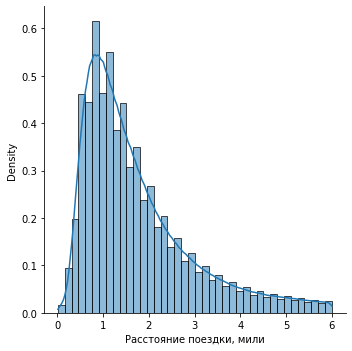

In [60]:
plt.figure(figsize=(10,8))
sns.displot(file, x = 'trip_distance', kind='hist', kde=True, stat="density", bins=40)
plt.xlabel("Расстояние поездки, мили")
plt.ylabel("Density")

##### Судя по распределению, чаще всего расстояние поездки - до одной мили

### 14. Ящичная диаграмма времени поездки

Text(0.5, 0, 'Время поездки, минуты')

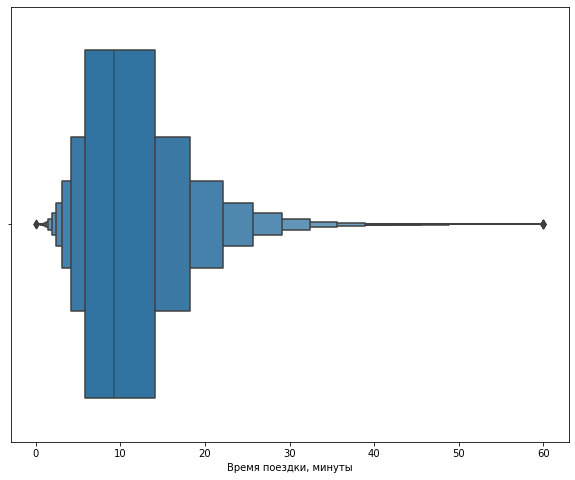

In [76]:
plt.figure(figsize=(10,8))
sns.boxenplot(data=file, x = 'ride_time')
plt.xlabel('Время поездки, минуты')

##### Судя по диаграмме, половина поездок длится до 10 минут. Boxenplot() - более подходящий график для крупных датасетов. Он лучше показывает, как распределены данные за пределами "коробки" в обыкновенном boxplot() .

### 15. Скрипичные диаграммы расстояния поездки по дням недели

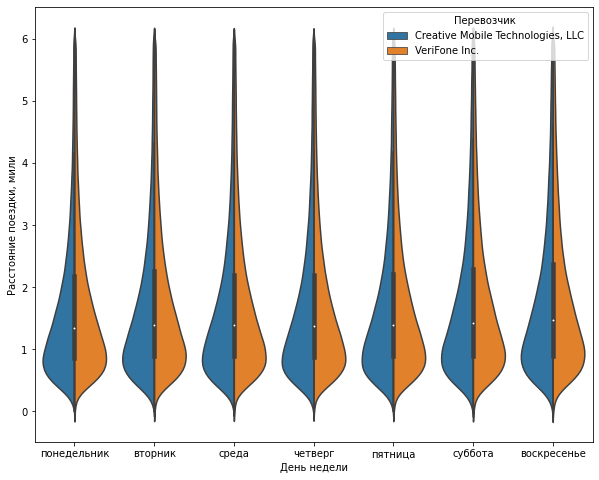

In [112]:
plt.figure(figsize=(10,8))
vln = sns.violinplot(data=file, x="day_of_week", y="trip_distance", hue="VendorID", split=True)
plt.xlabel('День недели')
plt.ylabel('Расстояние поездки, мили')
vln.set_xticklabels(['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье'])
vln.legend(handles=vln.legend_.legendHandles, title='Перевозчик', labels=['Creative Mobile Technologies, LLC', 'VeriFone Inc.'])

##### Различия по дням недели не видны, по перевозчикам тоже

### 16. Связь между расстоянием поездки и ценой

<Figure size 720x576 with 0 Axes>

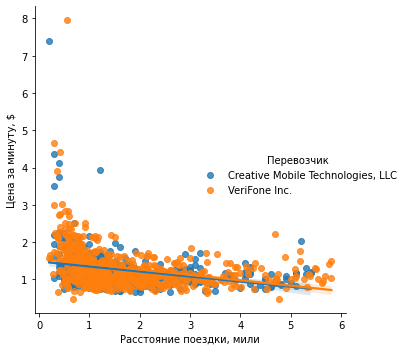

In [110]:
plt.figure(figsize=(10,8))
reg = sns.lmplot(data=file.sample(1000), x='trip_distance', y='price_per_min', hue='VendorID')
plt.xlabel('Расстояние поездки, мили')
plt.ylabel('Цена за минуту, $')

title = 'Перевозчик'
reg._legend.set_title(title)
labels = ['Creative Mobile Technologies, LLC', 'VeriFone Inc.']
for x, y in zip(reg._legend.texts, labels):
    x.set_text(y)

##### Связь прослеживается, но не является линейной